In [1]:
import numpy as np
import pandas as pd
import sounddevice as sd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.fftpack import fft

import time

### select device

In [4]:
sd.query_devices()

   0 Microsoft Sound Mapper - Input, MME (2 in, 0 out)
   1 Mikrofon (Komplete Audio 1), MME (2 in, 0 out)
   2 Microphone Array (Realtek(R) Au, MME (2 in, 0 out)
   3 Stereomix (Realtek(R) Audio), MME (2 in, 0 out)
   4 Microsoft Sound Mapper - Output, MME (0 in, 2 out)
   5 Lautsprecher (Komplete Audio 1), MME (0 in, 2 out)
<  6 Speaker (Realtek(R) Audio), MME (0 in, 2 out)
   7 PA278QV (NVIDIA High Definition, MME (0 in, 2 out)
   8 Primärer Soundaufnahmetreiber, Windows DirectSound (2 in, 0 out)
   9 Mikrofon (Komplete Audio 1), Windows DirectSound (2 in, 0 out)
  10 Microphone Array (Realtek(R) Audio), Windows DirectSound (2 in, 0 out)
  11 Stereomix (Realtek(R) Audio), Windows DirectSound (2 in, 0 out)
  12 Primärer Soundtreiber, Windows DirectSound (0 in, 2 out)
  13 Lautsprecher (Komplete Audio 1), Windows DirectSound (0 in, 2 out)
  14 Speaker (Realtek(R) Audio), Windows DirectSound (0 in, 2 out)
  15 PA278QV (NVIDIA High Definition Audio), Windows DirectSound (0 in, 2 out)
  

In [10]:
sd.default.device = [5,17]
sd.query_devices()

   0 Microsoft Sound Mapper - Input, MME (2 in, 0 out)
   1 Mikrofon (Komplete Audio 1), MME (2 in, 0 out)
   2 Microphone Array (Realtek(R) Au, MME (2 in, 0 out)
   3 Stereomix (Realtek(R) Audio), MME (2 in, 0 out)
   4 Microsoft Sound Mapper - Output, MME (0 in, 2 out)
>  5 Lautsprecher (Komplete Audio 1), MME (0 in, 2 out)
   6 Speaker (Realtek(R) Audio), MME (0 in, 2 out)
   7 PA278QV (NVIDIA High Definition, MME (0 in, 2 out)
   8 Primärer Soundaufnahmetreiber, Windows DirectSound (2 in, 0 out)
   9 Mikrofon (Komplete Audio 1), Windows DirectSound (2 in, 0 out)
  10 Microphone Array (Realtek(R) Audio), Windows DirectSound (2 in, 0 out)
  11 Stereomix (Realtek(R) Audio), Windows DirectSound (2 in, 0 out)
  12 Primärer Soundtreiber, Windows DirectSound (0 in, 2 out)
  13 Lautsprecher (Komplete Audio 1), Windows DirectSound (0 in, 2 out)
  14 Speaker (Realtek(R) Audio), Windows DirectSound (0 in, 2 out)
  15 PA278QV (NVIDIA High Definition Audio), Windows DirectSound (0 in, 2 out)
  

In [27]:

#df_sample_data.to_csv("sample_data/keyboard_hoch_tief.csv")

def save_sample(df_signal, label, path_to_save = "ismael_vocal/"):
    df_audio = pd.DataFrame({'signal' : df_signal})
    df_audio['label'] = label
    df_audio.to_csv(path_to_save + label + ".csv")
    return(df_audio)



def analyze_microphone_signal(duration=2, sample_rate=44100):
    # Capture audio from microphone
    print("Recording...")
    audio_signal = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float64')
    sd.wait()  # Wait until recording is finished
    print("Recording finished.")
    
    #sd.play(audio_signal)

    # Flatten the array
    audio_signal = audio_signal.flatten()

    # Time-domain plot
    time = np.linspace(0, duration, int(duration * sample_rate), endpoint=False)
    plt.figure(figsize=(12, 6))
    plt.subplot(3, 1, 2)
    plt.plot(time, audio_signal)
    plt.title("Time Domain Signal")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    
    # Frequency-domain plot
    N = len(audio_signal)
    T = 1.0 / sample_rate
    yf = fft(audio_signal)
    xf = np.fft.fftfreq(N, T)[:N//2]
    plt.subplot(3, 1, 3)
    plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    plt.title("Frequency Domain Signal")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude")
    
    # Frequency-domain plot
    N = len(audio_signal)
    T = 1.0 / sample_rate
    yf = fft(audio_signal)
    yf = 2.0/N * np.abs(yf[:N//2])
    xf = np.fft.fftfreq(N, T)[:N//2]
    df_f = pd.DataFrame({'f': xf,
                         'psd': yf})

    plt.subplot(3, 1, 1)
    sns.lineplot(data = df_f[ (df_f.f > 100) &(df_f.f < 2000)], x = 'f', y= 'psd')
    #plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    plt.title("Frequency Domain Signal detail")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude")

    # Show plots
    plt.tight_layout()
    plt.show()

    return(audio_signal, df_f)


In [40]:
file_nr = [26,27,28,29,30]

NEUE Aufnahme
Recording...
Recording finished.


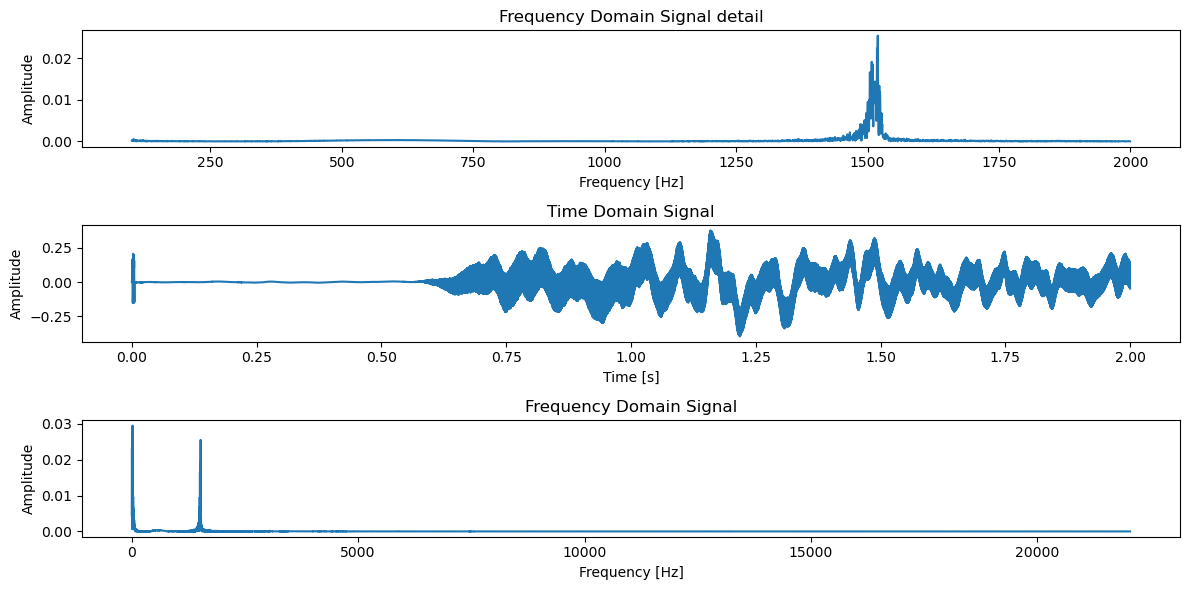

NEUE Aufnahme
Recording...
Recording finished.


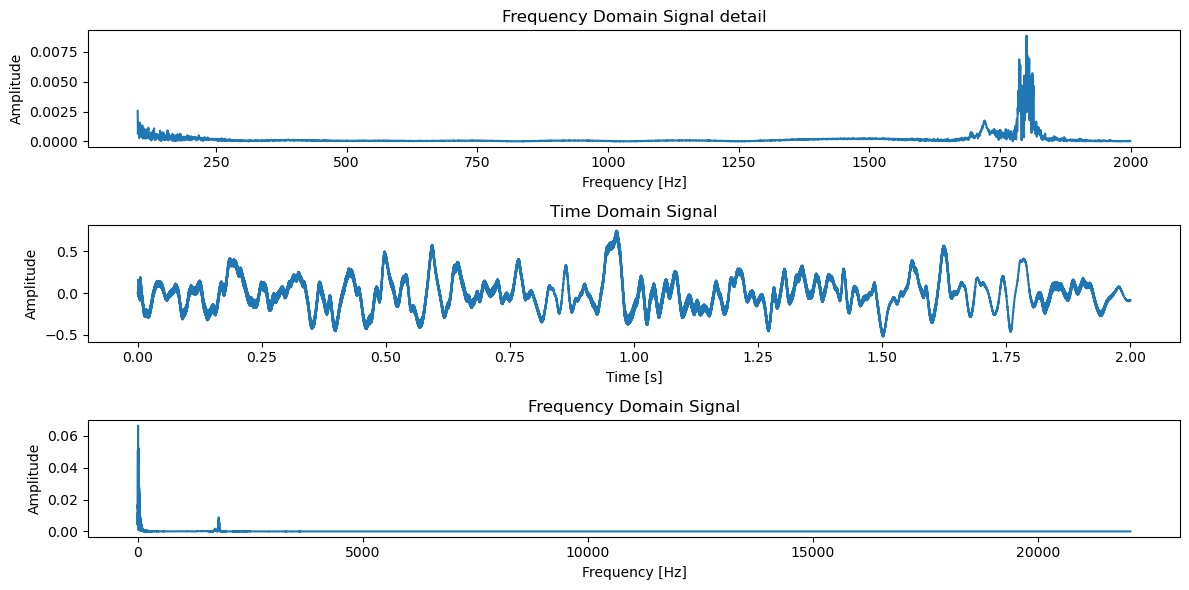

NEUE Aufnahme
Recording...
Recording finished.


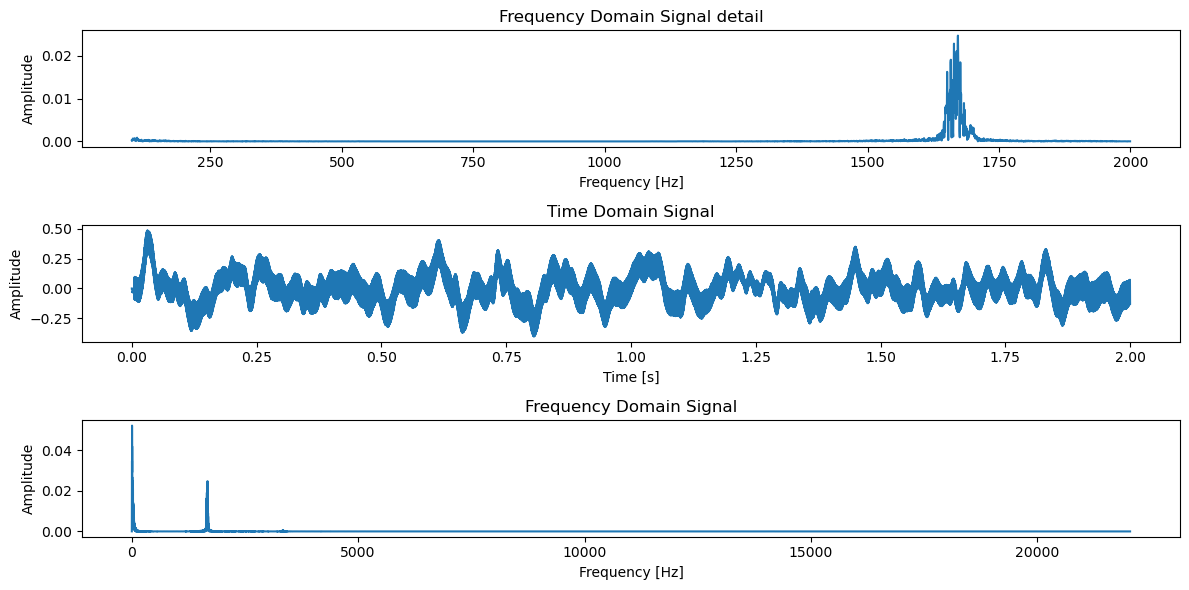

NEUE Aufnahme
Recording...
Recording finished.


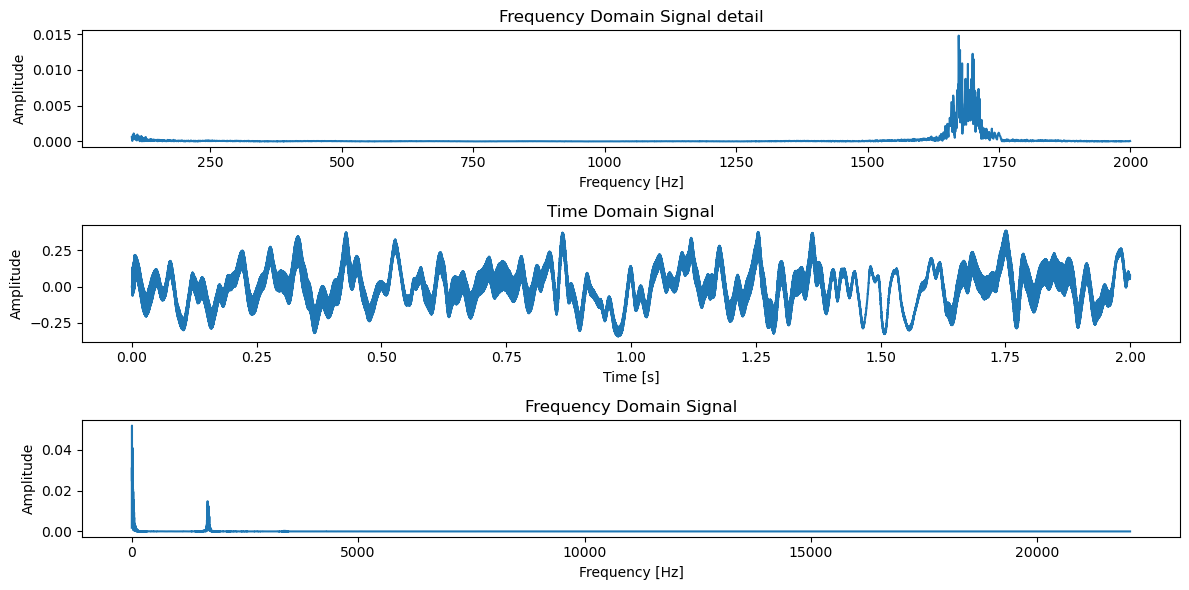

NEUE Aufnahme
Recording...
Recording finished.


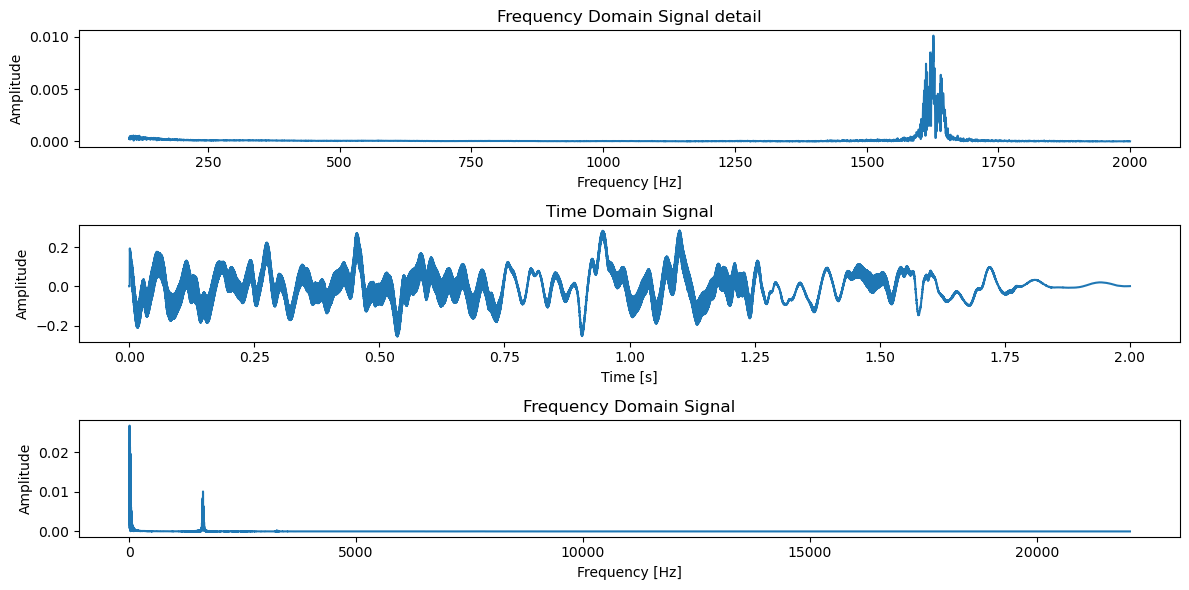

In [41]:
for i in file_nr:
    print("NEUE Aufnahme")
    sample_1, df_fft_1 = analyze_microphone_signal()
    file_name = "tetst_1_file_"+ str(i)

    
    save_sample(sample_1, label = file_name)

    time.sleep(2)
    

In [17]:
def fft_from_signal(audio_signal,sample_rate = 44100, band_width = 50):
    N = len(audio_signal)
    T = 1.0 / sample_rate
    yf = fft(audio_signal)
    xf = np.fft.fftfreq(N, T)[:N//2]
    
    # Frequency-domain plot
    N = len(audio_signal)
    T = 1.0 / sample_rate
    yf = fft(audio_signal)
    positive_magnitudes = yf[:N//2] 
    yf = 2.0/N * np.abs(yf[:N//2])
    xf = np.fft.fftfreq(N, T)[:N//2]
    df_f = pd.DataFrame({'f': xf,
                         'psd': yf})



    # Calculate the number of bands
    num_bands = int(np.max(xf) // band_width) + 1

    # Sum the magnitudes within each band
    band_magnitudes = np.zeros(num_bands)
    for i in range(num_bands):
        band_start_freq = i * band_width
        band_end_freq = (i + 1) * band_width
        band_mask = (xf >= band_start_freq) & (xf < band_end_freq)
        band_magnitudes[i] = np.sum(abs(positive_magnitudes[band_mask]))

    # Identify the three most dominant bands
    dominant_bands_indices = np.argsort(band_magnitudes)[-3:][::-1]
    dominant_bands = [(i * band_width, (i + 1) * band_width) for i in dominant_bands_indices]

    plt.figure(figsize=(8, 3))
    sns.lineplot(data = df_f[ (df_f.f > 100) &(df_f.f < 2000)], x = 'f', y= 'psd')
    #plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    for band in dominant_bands:
        plt.axvspan(band[0], band[1], color='red', alpha=0.3, label=f'{band[0]} Hz - {band[1]} Hz')
    plt.title("Frequency Domain Signal detail", y = 1.1)
    plt.suptitle(dominant_bands_indices, y=0.76)
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude")

    # Show plots
    plt.tight_layout()
    plt.show()

    

    return( dominant_bands_indices)



tetst_1_file_15


c:\Users\rigle\.conda\envs\ml_9\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


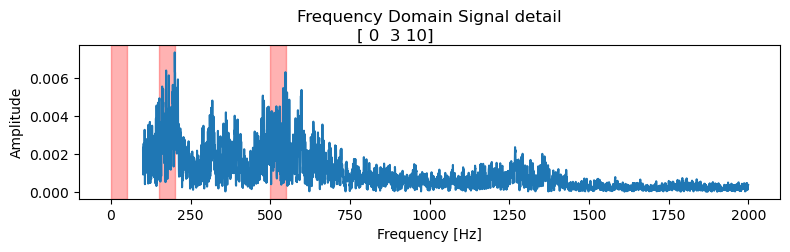

tetst_1_file_16


c:\Users\rigle\.conda\envs\ml_9\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


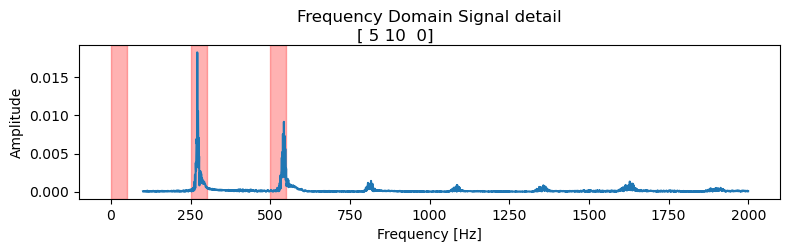

tetst_1_file_17


c:\Users\rigle\.conda\envs\ml_9\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


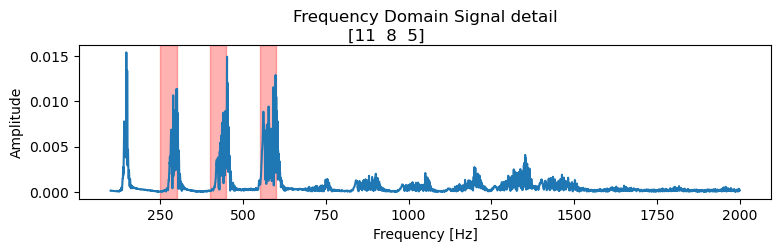

tetst_1_file_18


c:\Users\rigle\.conda\envs\ml_9\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


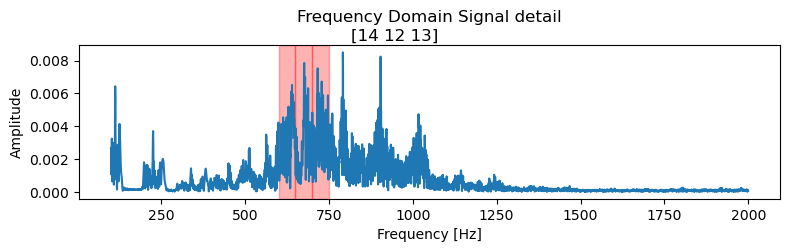

tetst_1_file_19


c:\Users\rigle\.conda\envs\ml_9\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


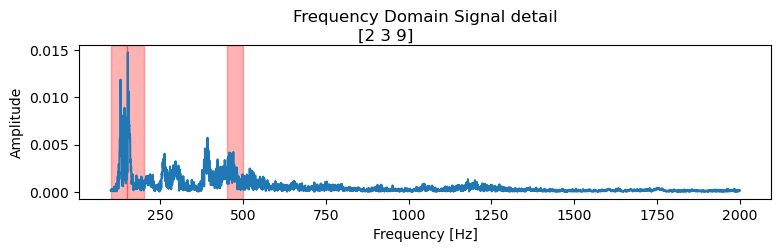

tetst_1_file_20


c:\Users\rigle\.conda\envs\ml_9\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


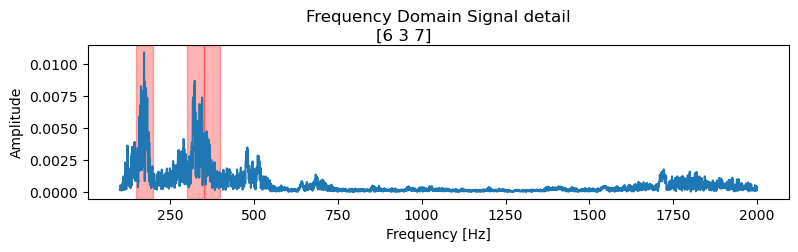

In [37]:
for i in file_nr:
    file_name = "tetst_1_file_"+ str(i)

    df_sample = pd.read_csv("ismael_vocal/" + file_name + ".csv")

    print(file_name)
    sd.play(df_sample['signal'].to_list())
    
    fft_from_signal(df_sample['signal'].to_list())

    time.sleep(1)

### for the pipeline

In [5]:

def analyze_microphone_signal(duration=2, sample_rate=44100):
    # Capture audio from microphone
    print("Recording...")
    audio_signal = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float64')
    sd.wait()  # Wait until recording is finished
    print("Recording finished.")
    
    #sd.play(audio_signal)

    # Flatten the array
    audio_signal = audio_signal.flatten()

    # Time-domain plot
    time = np.linspace(0, duration, int(duration * sample_rate), endpoint=False)
    plt.figure(figsize=(12, 6))
    plt.subplot(3, 1, 2)
    plt.plot(time, audio_signal)
    plt.title("Time Domain Signal")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    
    # Frequency-domain plot
    N = len(audio_signal)
    T = 1.0 / sample_rate
    yf = fft(audio_signal)
    xf = np.fft.fftfreq(N, T)[:N//2]
    plt.subplot(3, 1, 3)
    plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    plt.title("Frequency Domain Signal")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude")
    
    # Frequency-domain plot
    N = len(audio_signal)
    T = 1.0 / sample_rate
    yf = fft(audio_signal)
    yf = 2.0/N * np.abs(yf[:N//2])
    xf = np.fft.fftfreq(N, T)[:N//2]
    df_f = pd.DataFrame({'f': xf,
                         'psd': yf})

    plt.subplot(3, 1, 1)
    sns.lineplot(data = df_f[ (df_f.f > 100) &(df_f.f < 2000)], x = 'f', y= 'psd')
    #plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    plt.title("Frequency Domain Signal detail")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude")

    # Show plots
    plt.tight_layout()
    plt.show()

    return(audio_signal, df_f)

In [13]:
sd.default.device = [1,17]
sd.query_devices()

   0 Microsoft Sound Mapper - Input, MME (2 in, 0 out)
>  1 Mikrofon (Komplete Audio 1), MME (2 in, 0 out)
   2 Microphone Array (Realtek(R) Au, MME (2 in, 0 out)
   3 Stereomix (Realtek(R) Audio), MME (2 in, 0 out)
   4 Microsoft Sound Mapper - Output, MME (0 in, 2 out)
   5 Lautsprecher (Komplete Audio 1), MME (0 in, 2 out)
   6 Speaker (Realtek(R) Audio), MME (0 in, 2 out)
   7 PA278QV (NVIDIA High Definition, MME (0 in, 2 out)
   8 Primärer Soundaufnahmetreiber, Windows DirectSound (2 in, 0 out)
   9 Mikrofon (Komplete Audio 1), Windows DirectSound (2 in, 0 out)
  10 Microphone Array (Realtek(R) Audio), Windows DirectSound (2 in, 0 out)
  11 Stereomix (Realtek(R) Audio), Windows DirectSound (2 in, 0 out)
  12 Primärer Soundtreiber, Windows DirectSound (0 in, 2 out)
  13 Lautsprecher (Komplete Audio 1), Windows DirectSound (0 in, 2 out)
  14 Speaker (Realtek(R) Audio), Windows DirectSound (0 in, 2 out)
  15 PA278QV (NVIDIA High Definition Audio), Windows DirectSound (0 in, 2 out)
  

Recording...
Recording finished.


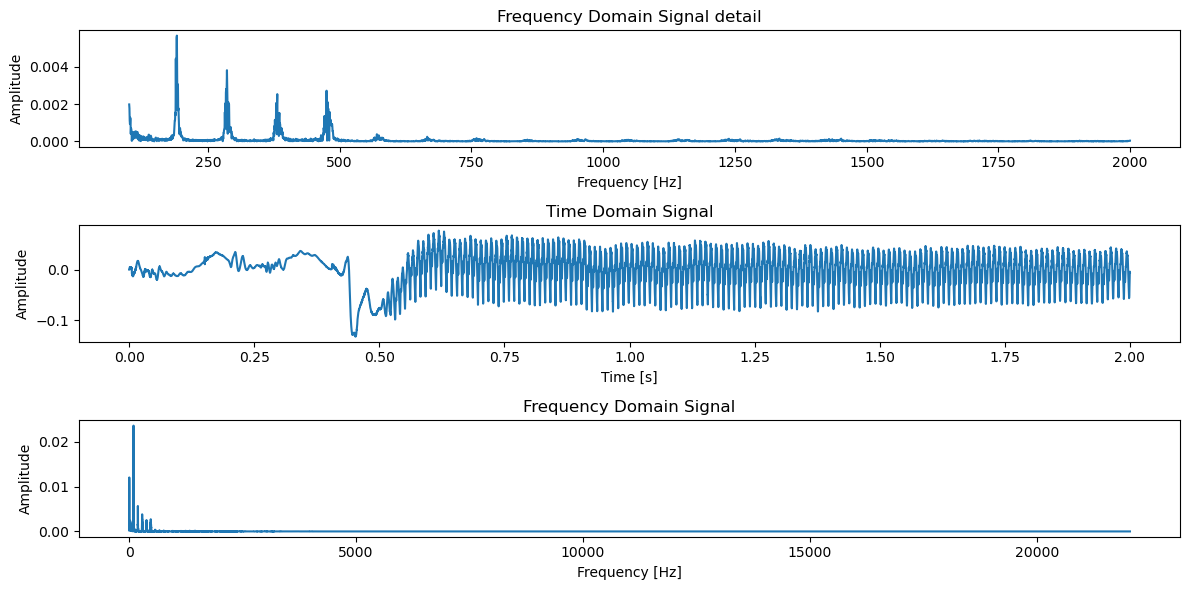

(array([ 0.00000000e+00,  0.00000000e+00, -3.05175781e-05, ...,
        -5.03540039e-03, -5.21850586e-03, -5.52368164e-03]),
              f           psd
 0          0.0  2.551975e-04
 1          0.5  1.712837e-03
 2          1.0  5.616619e-03
 3          1.5  9.319550e-03
 4          2.0  1.204645e-02
 ...        ...           ...
 44095  22047.5  2.960834e-07
 44096  22048.0  2.543779e-07
 44097  22048.5  1.594280e-07
 44098  22049.0  2.124431e-07
 44099  22049.5  1.337826e-07
 
 [44100 rows x 2 columns])

In [14]:
#for testing:
analyze_microphone_signal()

Recording...
Recording finished.
[  10.    10.5   11.  ... 1999.  1999.5 2000. ]
[2.70109586e-05 1.66822848e-05 3.24292779e-05 ... 2.86844484e-05
 2.89819170e-05 3.31891950e-05]


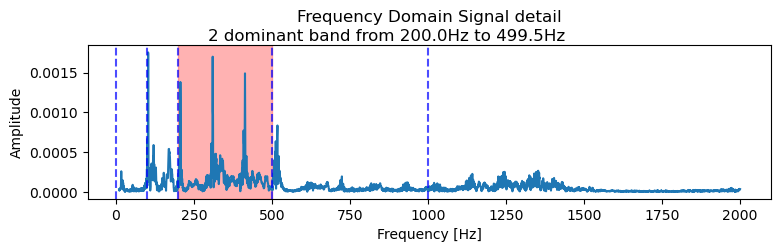

2


In [25]:



def fft_from_signal_dominant_band(duration=2,sample_rate=44100, f_min = 10,f_max = 2000, freq_bands=[0, 100, 200, 500, 1000], plot = True):
    
    # Capture audio from microphone
    print("Recording...")
    audio_signal = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float64')
    sd.wait()  # Wait until recording is finished
    print("Recording finished.")

    audio_signal = audio_signal.flatten()

    # FFT calculation
    N = len(audio_signal)
    T = 1.0 / sample_rate
    yf = fft(audio_signal)
    xf = np.fft.fftfreq(N, T)[:N//2]
    yf = 2.0/N * np.abs(yf[:N//2])

    # Filter to keep only frequencies up to f_max
    mask = xf <= f_max
    xf = xf[mask]
    yf = yf[mask]
    
    # Filter to keep only frequencies over f_min
    mask = xf >= f_min
    xf = xf[mask]
    yf = yf[mask]

    # Create a DataFrame for frequency and PSD

    df_f = pd.DataFrame({'f': xf, 'psd': yf})

    # Determine the frequency band for each frequency
    df_f['band'] = np.digitize(df_f['f'], freq_bands) - 1

    # Sum PSD values within each band
    band_psd_sum = df_f.groupby('band')['psd'].sum()
    
    # Find the index of the dominant frequency band
    dominant_band_index = band_psd_sum.idxmax()

    dominant_band_start = df_f[df_f.band == dominant_band_index].f.min()
    dominant_band_end = df_f[df_f.band == dominant_band_index].f.max()

    if plot == True:
        plt.figure(figsize=(8, 3))
        sns.lineplot(data = df_f, x = 'f', y= 'psd')
        #plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
        
        plt.axvspan(dominant_band_start, dominant_band_end, color='red', alpha=0.3)

        # Plot vertical lines at the freq_bands
        for band in freq_bands:
            plt.axvline(x=band, color='blue', linestyle='--', alpha=0.7)
        plt.title("Frequency Domain Signal detail", y = 1.1)
        plt.suptitle(str(dominant_band_index) +" dominant band from " + str(dominant_band_start) +"Hz to "+ str(dominant_band_end) + "Hz", y=0.76)
        plt.xlabel("Frequency [Hz]")
        plt.ylabel("Amplitude")

        # Show plots
        plt.tight_layout()
        plt.show()

    motor_nr = dominant_band_index

    print(motor_nr)
    # return motor_nr


fft_from_signal_dominant_band()

In [20]:
def fft_from_signal_dominant_band(duration=2,sample_rate=44100, f_min = 10,f_max = 2000, freq_bands=[0, 100, 200, 500, 1000], plot = True):
    
    # Capture audio from microphone
    print("Recording...")
    audio_signal = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float64')
    sd.wait()  # Wait until recording is finished
    print("Recording finished.")

    # FFT calculation
    N = len(audio_signal)
    T = 1.0 / sample_rate
    yf = fft(audio_signal)
    xf = np.fft.fftfreq(N, T)[:N//2]
    yf = 2.0/N * np.abs(yf[:N//2])

    # Filter to keep only frequencies up to f_max
    mask = xf <= f_max
    xf = xf[mask]
    yf = yf[mask]
    
    # Filter to keep only frequencies over f_min
    mask = xf >= f_min
    xf = xf[mask]
    yf = yf[mask]

    # Create a DataFrame for frequency and PSD
    print(xf)
    print(yf)

    #df_f = pd.DataFrame({'f': xf, 'psd': yf})
    return(xf,yf)



xf,yf = fft_from_signal_dominant_band()

Recording...
Recording finished.
[  10.    10.5   11.  ... 1999.  1999.5 2000. ]
[[0.00000000e+00]
 [0.00000000e+00]
 [6.92008574e-10]
 ...
 [1.66082058e-08]
 [1.66082058e-08]
 [1.66082058e-08]]


In [24]:
xf

array([  10. ,   10.5,   11. , ..., 1999. , 1999.5, 2000. ])